<a href="https://colab.research.google.com/github/2303A51738/AIML/blob/main/2303A51738_labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/sample_data/weather_forecast_data.csv')

In [6]:
df.head(5)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [7]:
df.shape

(2500, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [9]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [10]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


In [11]:
df.dtypes

,0
Temperature,float64
Humidity,float64
Wind_Speed,float64
Cloud_Cover,float64
Pressure,float64
Rain,object


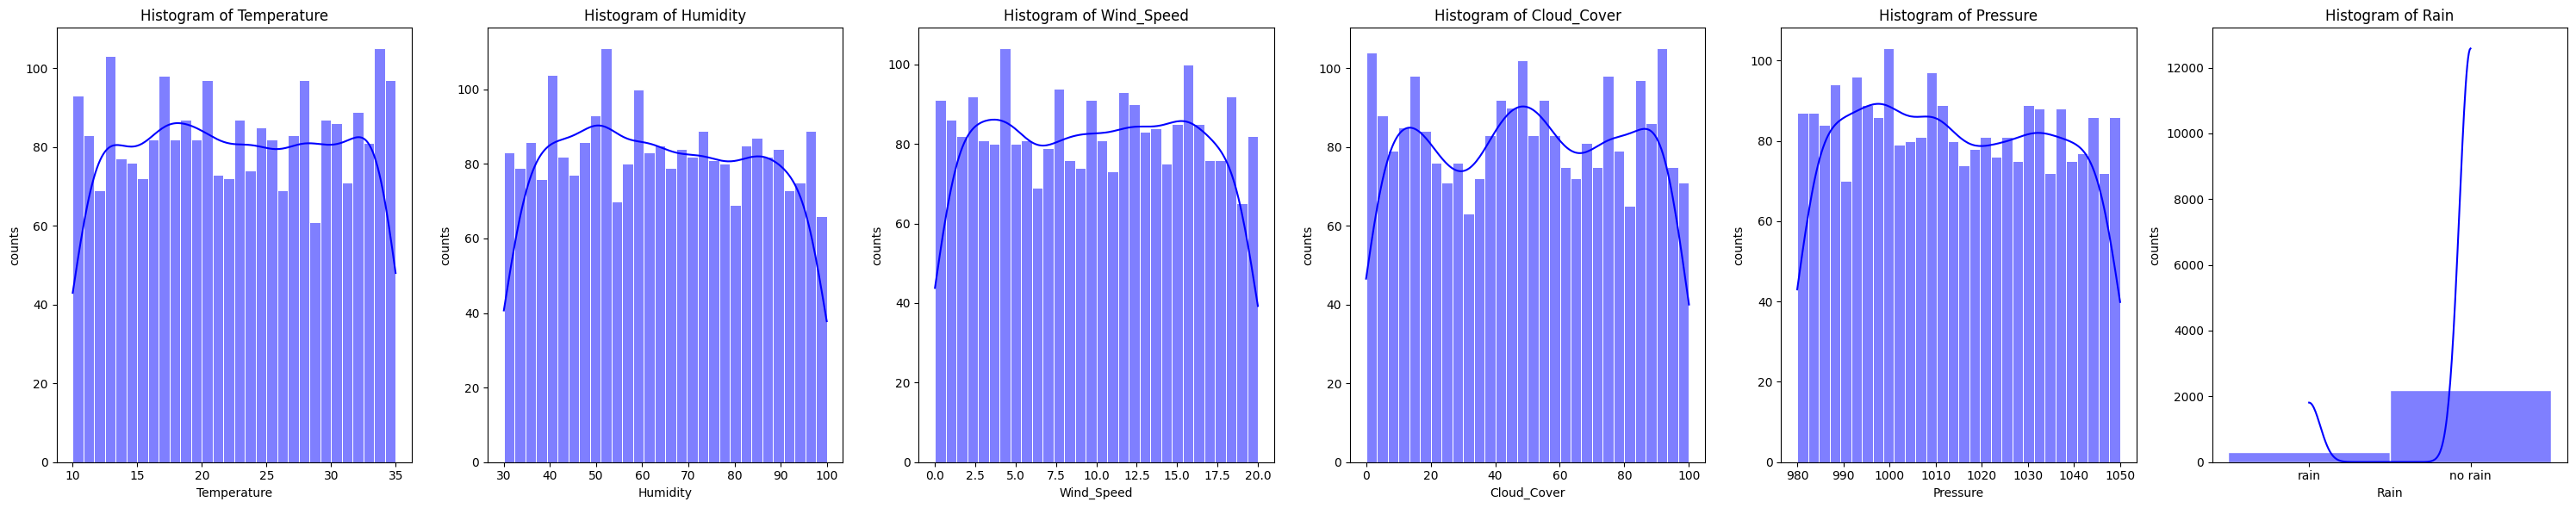

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Number of columns in the DataFrame
n_cols = len(df.columns)

# Create subplots: one row, multiple columns (side by side)
fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 6))  # Adjust figure size dynamically based on the number of columns

# Loop over each column and plot histogram with KDE line
for i, ax in zip(df.columns, axes):
    sns.histplot(df[i], bins=30, kde=True, color='blue', edgecolor='white', ax=ax)
    ax.set_xlabel(i)
    ax.set_ylabel('counts')
    ax.set_title(f'Histogram of {i}')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

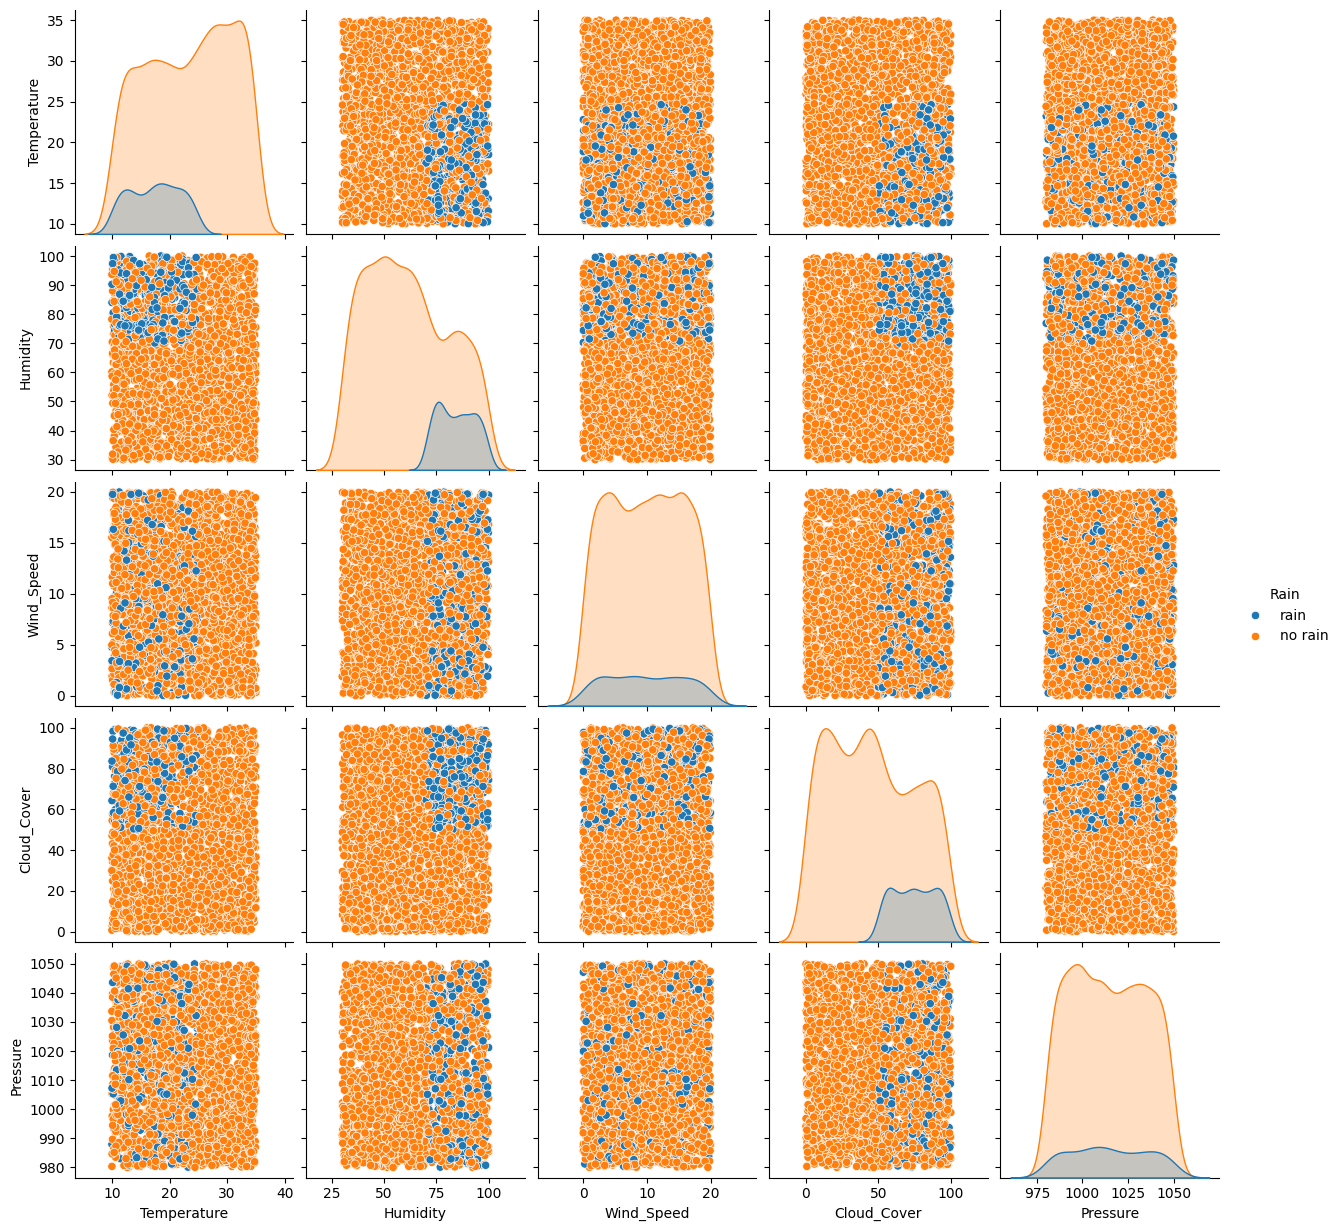

In [13]:
sns.pairplot(df,hue='Rain')
plt.show()

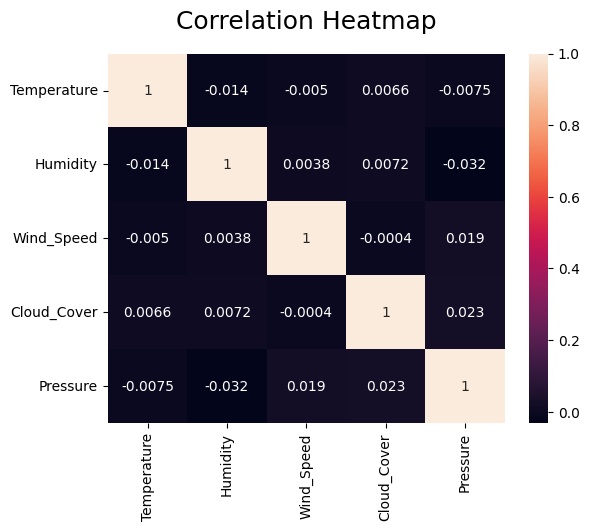

In [14]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':18}, pad=18)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Rain' column
df['Rain_Encoded'] = label_encoder.fit_transform(df['Rain'])

print(df)

      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain  \
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain   
1       27.879734  46.489704    5.952484     4.990053   992.614190  no rain   
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain   
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain   
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain   
...           ...        ...         ...          ...          ...      ...   
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain   
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain   
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain   
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain   
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain   

      Rain_Encoded  
0                1  
1        

In [16]:
df1=df.drop(columns=['Rain'])

In [17]:
df1.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain_Encoded
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


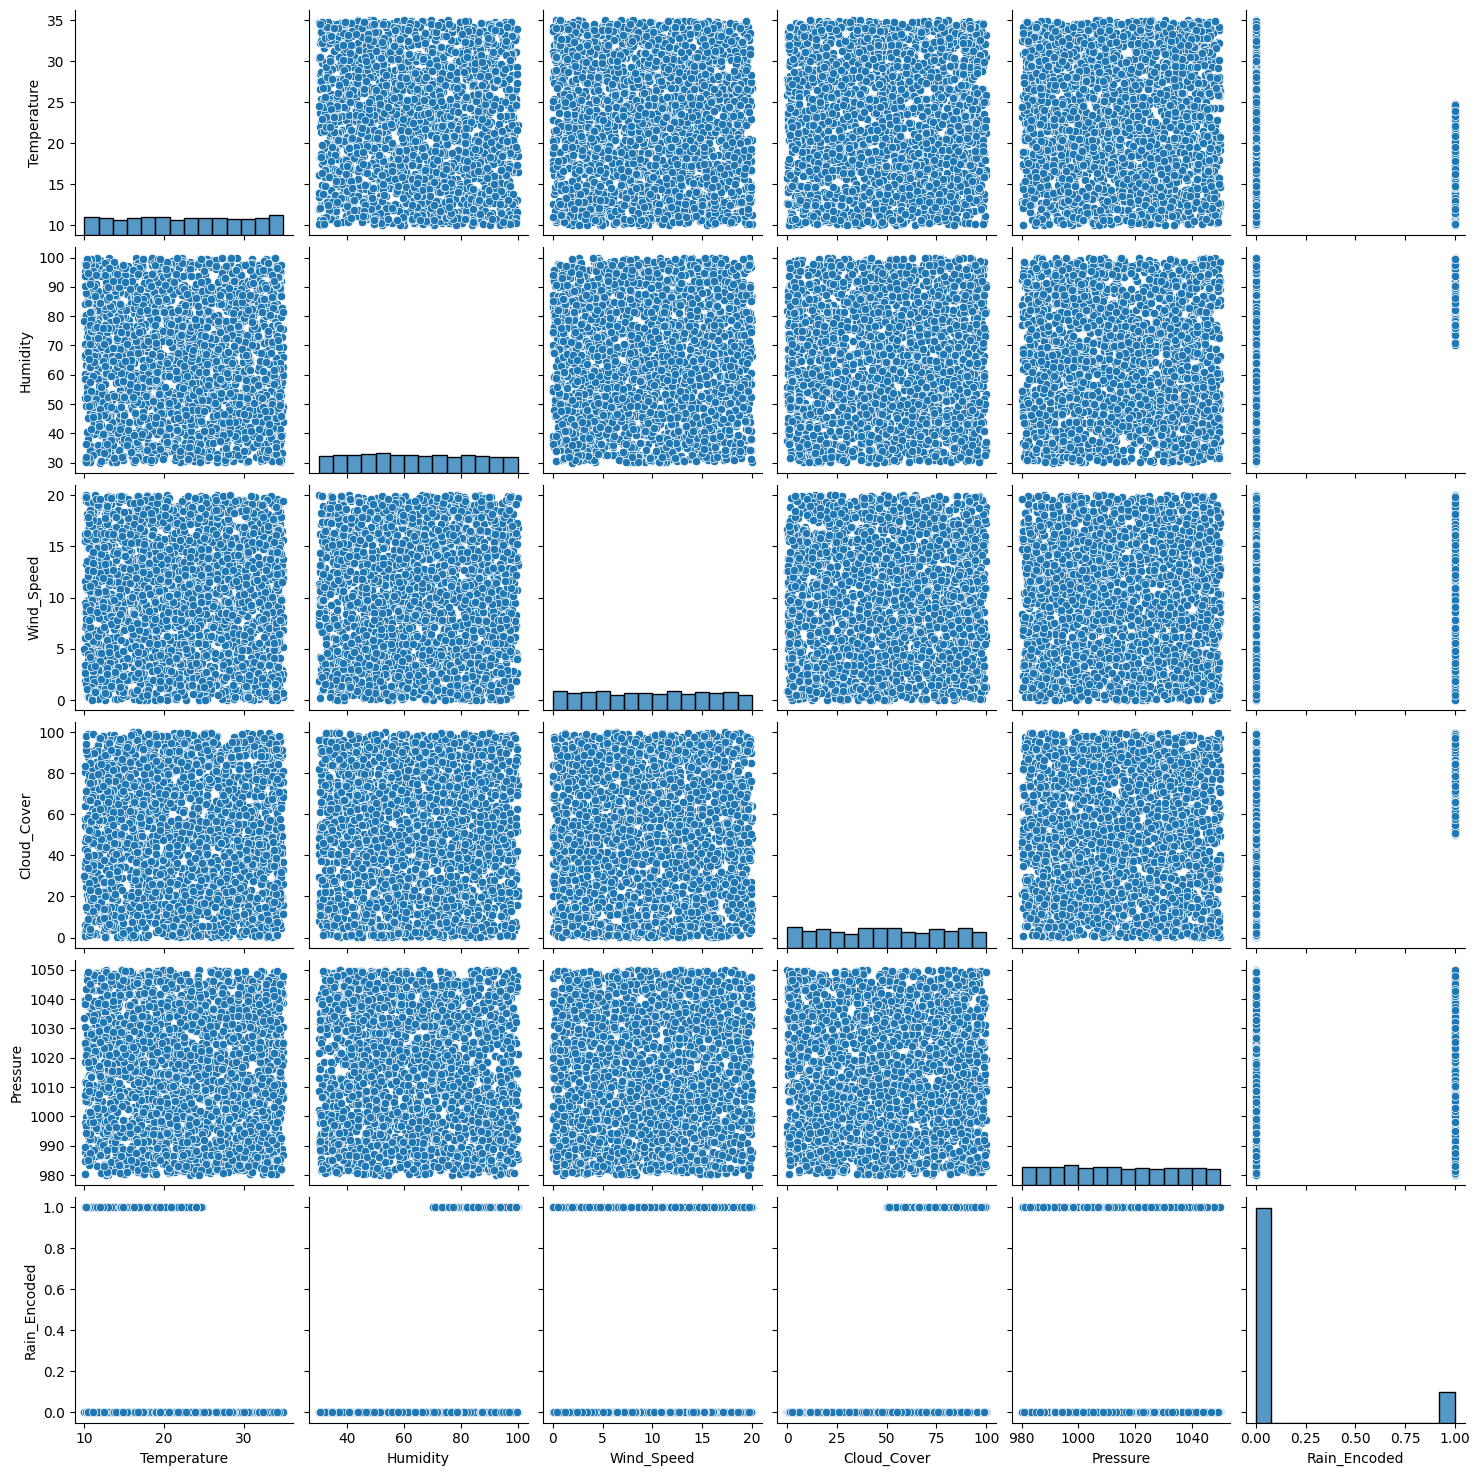

In [18]:
sns.pairplot(df1)
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df1)

In [20]:
df1_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [21]:
print("Scaled DataFrame:")
print(df1_scaled)

Scaled DataFrame:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure  Rain_Encoded
0        0.548885  0.851343    0.366485     0.504954  0.748370           1.0
1        0.715305  0.235520    0.297292     0.049759  0.180070           0.0
2        0.602850  0.758193    0.068145     0.148433  0.388977           0.0
3        0.544954  0.633821    0.352225     0.672518  0.037409           1.0
4        0.423693  0.955157    0.231829     0.476696  0.011586           0.0
...           ...       ...         ...          ...       ...           ...
2495     0.471715  0.218107    0.590184     0.550391  0.538389           0.0
2496     0.702452  0.235407    0.544045     0.397069  0.408404           0.0
2497     0.724449  0.197337    0.144443     0.758410  0.273037           0.0
2498     0.191548  0.398658    0.118308     0.023641  0.950212           0.0
2499     0.662276  0.958625    0.928159     0.813565  0.310338           0.0

[2500 rows x 6 columns]


In [22]:
df1_scaled.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain_Encoded
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.503329,0.490654,0.495086,0.496516,0.490172,0.125600
std,0.293158,0.285099,0.289170,0.291281,0.288640,0.331464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254370,0.247666,0.237732,0.238891,0.241873,0.000000
50%,0.501517,0.484563,0.495202,0.494818,0.477605,0.000000
75%,0.759187,0.736593,0.747329,0.753221,0.739171,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
